**Name: Willy Alberto Piñones Olivares**

**Student ID number:23430524**

**Task 1: Data Preparation Pipeline**

we are going demostrates:
- the K-means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space an visualise it as a scatterplot.

we use the same dataset that we used in E-tivity 1. The goal si to find a clustering of dataset when the label is removed. A secondary goal is to use manifold learning techniques for visualising the clustering in 2D.

**1-** Import Python Modules and Dataset

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Meand clustering
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer #needed for data preparation

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config

Load the Dataset

In [282]:
df = pd.read_csv("./bank.csv")
print('(number of examples, number of attributes):', df.shape)

(number of examples, number of attributes): (2000, 17)


**2-** Exploratory Data Analysis and Data Preparation

In [283]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [284]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

**3-** Quick Examination of Numercial Attributes

In [285]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

There are a few inferences we can draw by looking at the output of describe()

- Age has(2000-1988) 12 missing values.
- the rest of numerical attributes do not have missig values (just the dataset shows above).

It can be observed in the row **min** that both **balance** and **pdays** have negative values. That means that in **pdays** the number (-1) means that the client was not previously contacted. When **Balance** is negative that typically indicates that, over the course of the year, the account´s balance is below zero, indicating that more money has been spent(or withdrawn) than has been deposited or credited into the account. This could be due to various reasons, such as overdrafts, unpaid fees or simply spending more than available funds.

In [286]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

The dataset above shows the missing values for every attribute:

- **Age** has 12 missing values.
- **Job** has 10 missing values.
- **Education** has 104 missing values.
- **Contact** has 191 missing values.
- **Poutcome** has 454 missing values.

In conclusion the attribute called **poutcome** has the most missing values with 454.

We can further examine the pairwise distribution between **age**, **balance**, **day**, **duration**, **campaign**, **pdays**, and **previous**.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


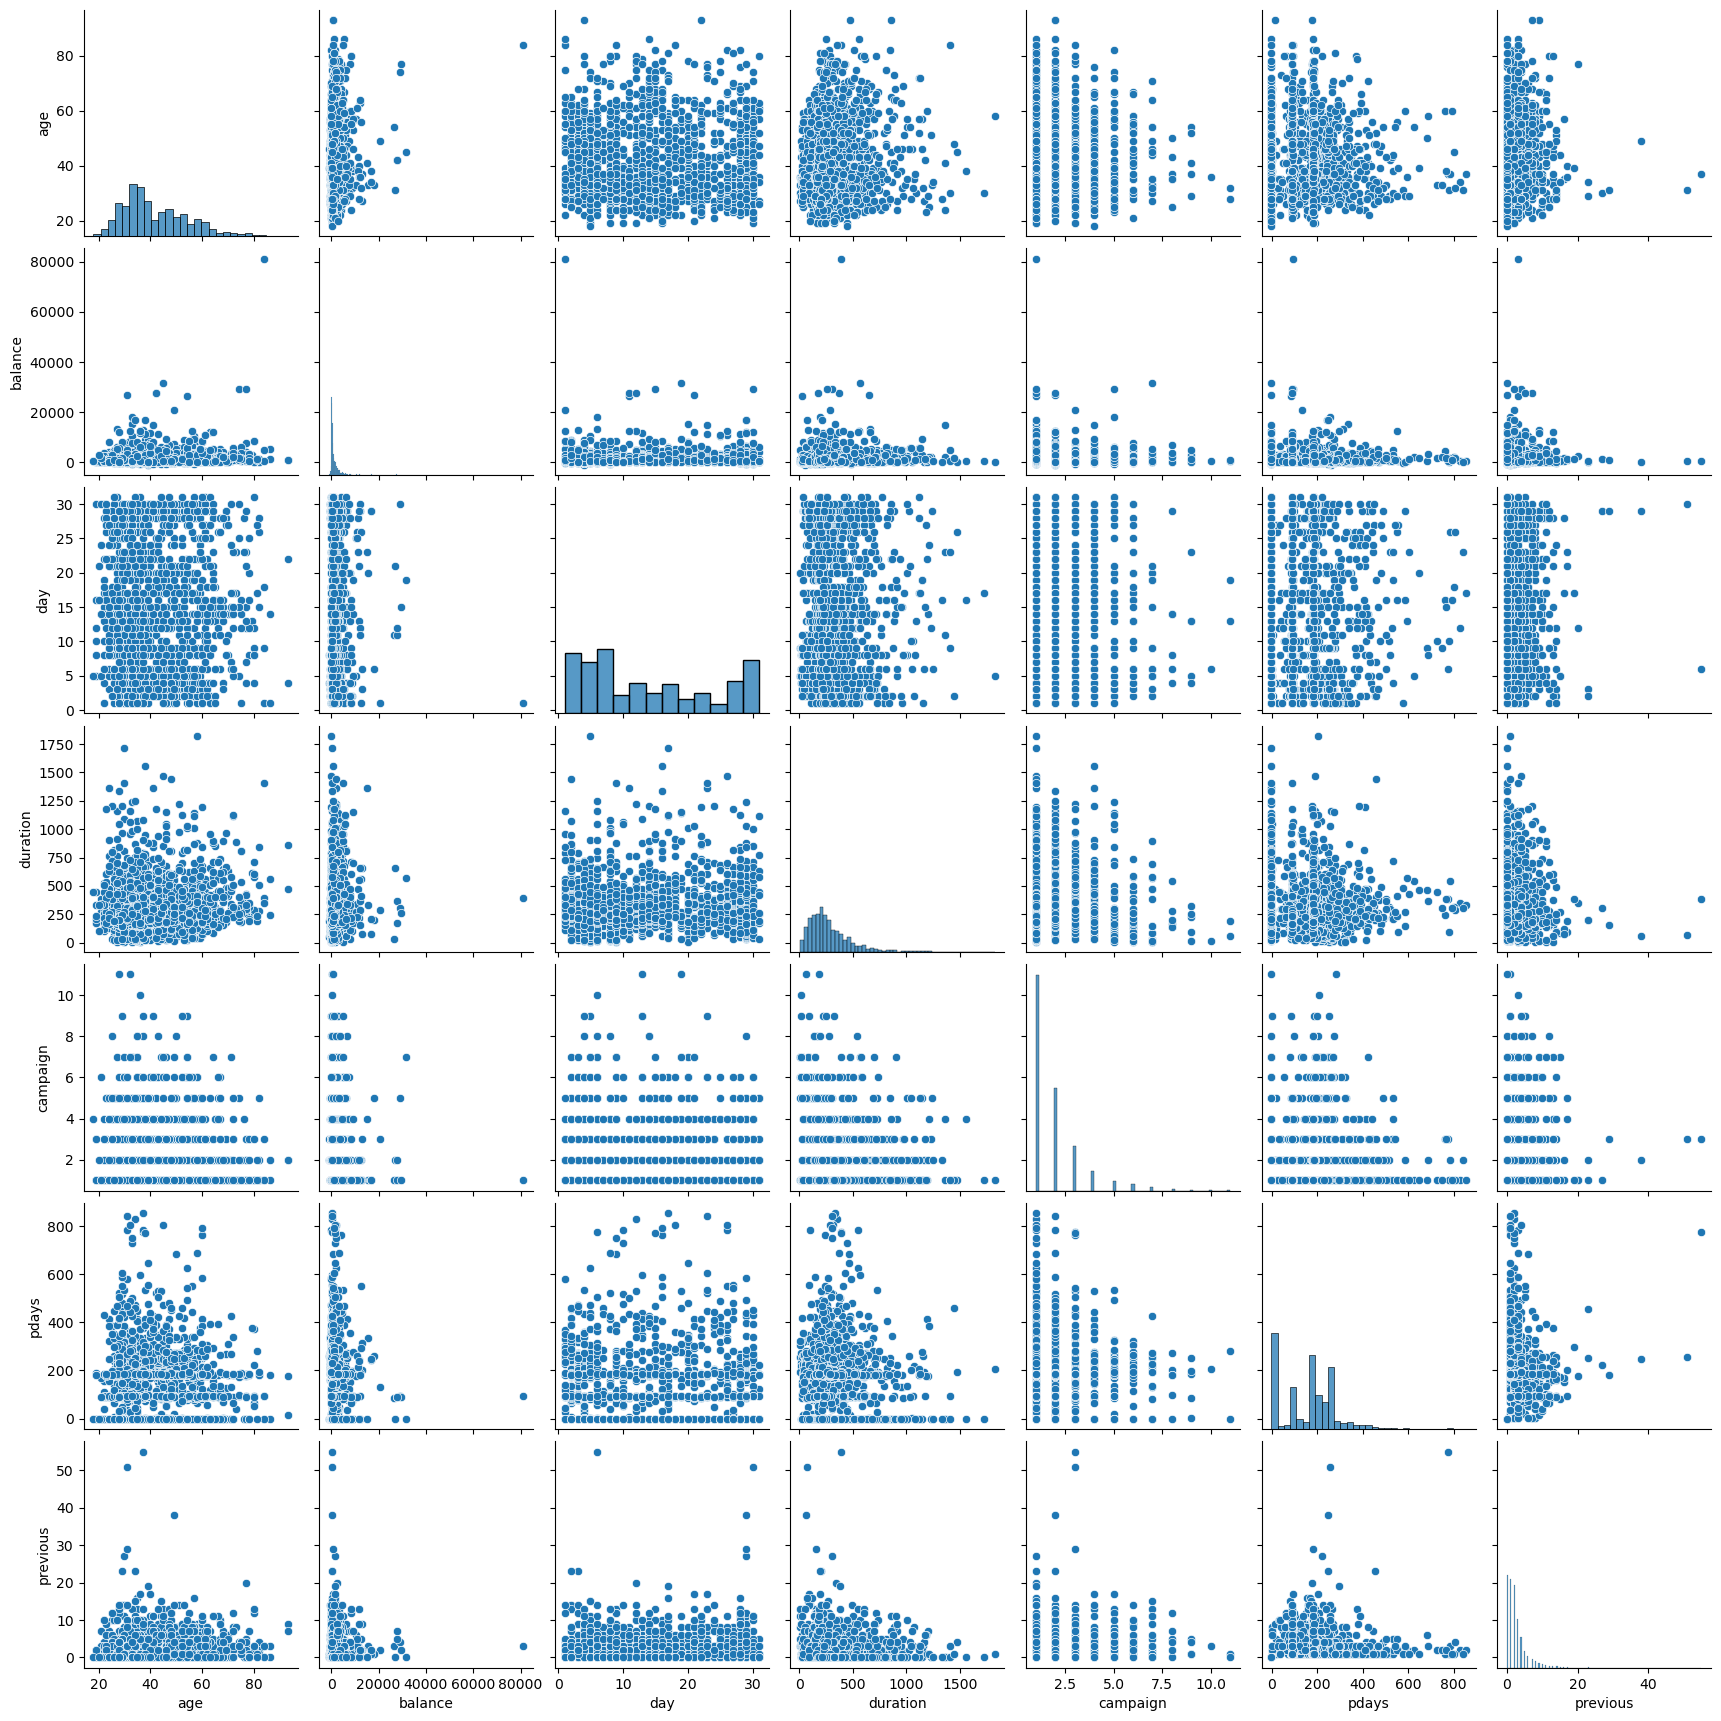

In [287]:
# note that by applying the method dropna() we drop all rows with missing values
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

**4-** Distribution Analysis for Numercial attributes

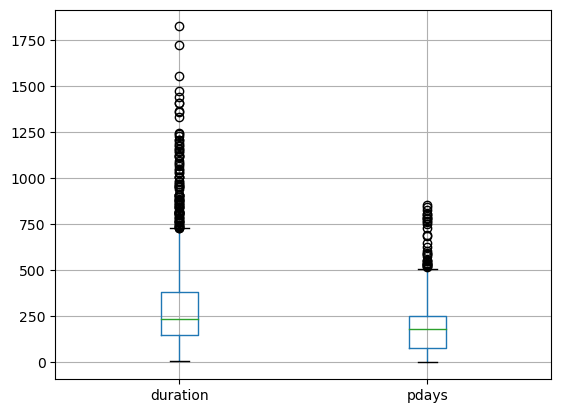

In [288]:
df.boxplot(column= ['duration', 'pdays'])
plt.show()

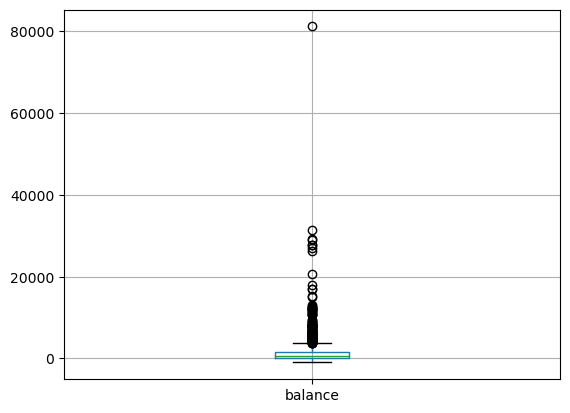

In [289]:
df.boxplot(column='balance')
plt.show()

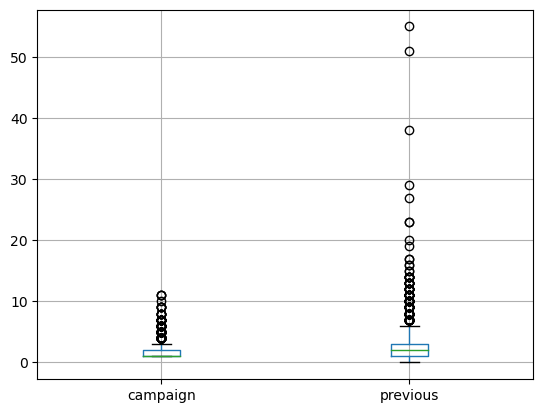

In [290]:
df.boxplot(column= ['campaign', 'previous'])
plt.show()

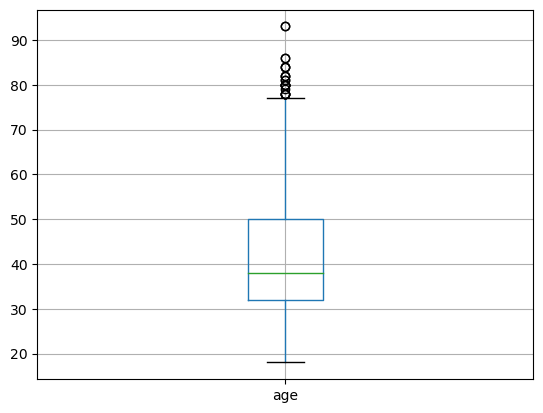

In [291]:
df.boxplot(column= ['age'])
plt.show()

We can see in the box plot above some outliers for **duration**, **pdays**, **balance**, **campaign**, **previous** and **age**. However, the attributes **duration**, **pdays**, **balance** and  **previous** have more extreme values.

**5-** Distribution for Categorical Attributes

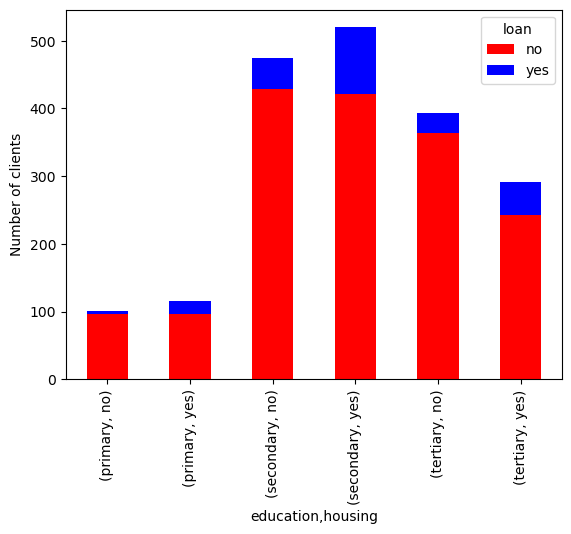

In [292]:
crosstab_CGL = pd.crosstab([df['education'], df['housing']], df['loan'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of clients')
plt.show()

We can see in the graph above that most of clients do not have personal **loan** and **housing** loan in **secondary** . Furthemore, we can see almost the half of the clients in secondary have **housing** loan.

In [293]:
df.drop('contact', axis=1, inplace=True)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

      day month  duration  campaign  pdays  previous poutcome subscribed  
1995   16   sep       327         2     -1         0      NaN        yes  
1996   16   sep      1334         2     -1         0      NaN        yes  
1997   17   sep       231         1     -1         0      NaN        yes  
1998   20   sep       185         1     -1         0      NaN        yes  
1999   22   sep       208         2     -1         0      NaN        yes

The column **contact** was dropped because it contains unuseful information such as contact communication type.

**6- Encode the Data**

We can encode the ordinal feature using mapping to transform categorical feautures into numerical. 

In [294]:
default_map ={'yes': 1, 'no': 0}

housing_map = {'yes': 1, 'no': 0}

loan_map = {'yes': 1, 'no': 0}

subscribed_map = {'yes': 1, 'no': 0}

#transform categorical feautures into numerical features

def encode(df_pre):
    df_pre.loc[:,'default'] = df_pre['default'].map(default_map)
    df_pre.loc[:,'housing'] = df_pre['housing'].map(housing_map)
    df_pre.loc[:,'loan'] = df_pre['loan'].map(loan_map)
    df_pre.loc[:,'subscribed'] = df_pre['subscribed'].map(subscribed_map)
    
    return df_pre

df = encode(df)

We can difine numerical columns in **numer_cols**, and categorical columns in **categ_cols**.

In [295]:
numer_cols = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous', 'default', 'housing', 'loan', 'subscribed']

categ_cols = ['job', 'marital', 'education','month', 'poutcome']


For numerical feauture, we can use SimpleImputer to fill missing values with the mean of that column and MinMaxscaler to scale the value to range from 0 to 1. On the other hand, for categorical features we can use SimpleImputer to fill in the missing values with the most frequency value of that column and OneHotEncoder to split to many numerical columns for model training.

In [296]:
numer_pipeline  = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')), ('scale', MinMaxScaler())])

categ_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

we can create ColumnTransformer to apply the pipeline for each column set.

In [297]:
preprocess_pipeline = ColumnTransformer(transformers=[('numer_pipeline',numer_pipeline,numer_cols), ('categ_pipeline',categ_pipeline,categ_cols)], remainder='drop', n_jobs=-1)

Then we can add a Model to the Final Pipeline:

In [298]:
clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[('preprocess_pipeline', preprocess_pipeline), ('model', clf)])

In [300]:
set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('preprocess_pipeline',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numer_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'default', 'housing', 'loan',
                                                   'subscribed']),
                                                 ('categ_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'education', 'month',
                                                   'poutcome'])])),
                ('model', LogisticRegression(random_state=0))])

In [301]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('preprocess_pipeline', ColumnTransformer(n_jobs=-1,
                     transformers=[('numer_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['age', 'balance', 'day', 'duration',
                                     'campaign', 'pdays', 'previous', 'default',
                                     'housing', 'loan', 'subscribed']),
                                   ('categ_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                       

**7-** K-Means Clustering

The k-Means Clustering algorithm has the number of clusters k as an input parameter n_clusters. We construct a final pipeline for trining a k-Means clustering model for a fixed value of n_clusters=3. The Final pipeline has the preprocessing pipeline as its first step followed by the scikit-learn KMeans algorithm as a second step.

In [302]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [303]:
k = 3
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('kMeans', cluster.KMeans(n_clusters=k, n_init=10, max_iter=300))])

Next, we fit the pipeline on the datesat to train a clustering model.

In [304]:
clustering_model = pipe.fit(df)

In [305]:
preprocessed_data = clustering_model['preprocess'].transform(df)
preprocessed_data

array([[0.18666667, 0.01669425, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.28      , 0.02029592, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.54666667, 0.02451815, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.84      , 0.02596612, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.37333333, 0.0647693 , 0.63333333, ..., 1.        , 0.        ,
        0.        ],
       [0.29333333, 0.089835  , 0.7       , ..., 1.        , 0.        ,
        0.        ]])

**8-** Apply a manifold-learning technique to project the data set to 2D space

Append the cluster centers to the preprocessed dataset.

In [306]:
data_and_centers = np.r_[preprocessed_data,clustering_model['kMeans'].cluster_centers_]

We can apply multi-dimensional scaling **(MDS)** to project both the data and the k-Means cluster centers to 2D space

Project both the data and the k-Means cluster centers to 2D.

In [307]:
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and centers. Use the cluster assigment to colour the examples.

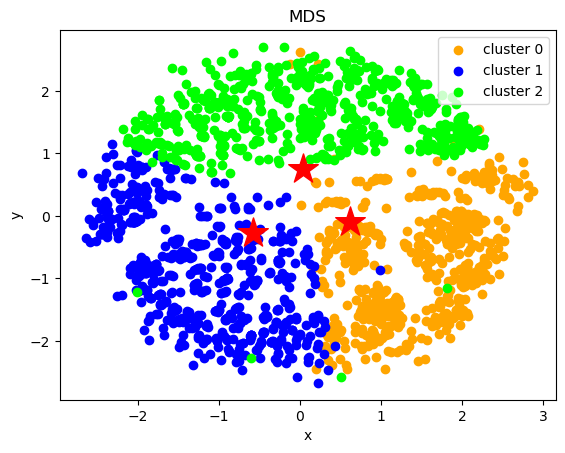

In [308]:
clustering_scatterplot(points=XYcoordinates[:-k,:], labels=clustering_model['kMeans'].labels_, centers=XYcoordinates[-k:,:], title='MDS')

We can apply **t-SNE** to project both the data and the k-Means cluster centers to a 2D space.

Then we can plot the transformed examples and the centers.

In [309]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


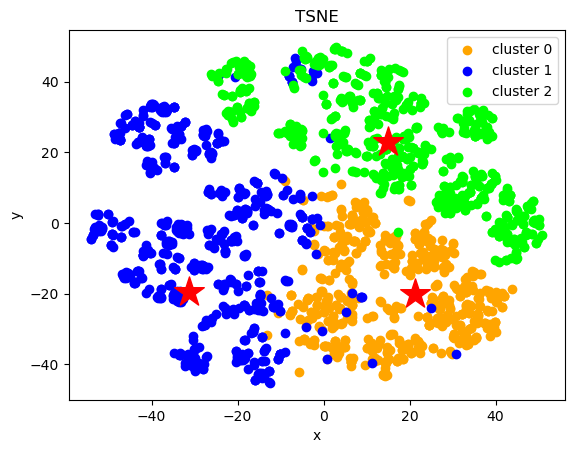

In [310]:
clustering_scatterplot(points=XYcoordinates[:-k,:], labels=clustering_model['kMeans'].labels_, centers=XYcoordinates[-k:,:], title='TSNE')

**9-** Cluster Analysis

In [252]:
df['cluster'] = pd.Series(clustering_model['kMeans'].labels_, index=df.index)